In [1]:
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing  
import time

In [2]:
def rmsle(y_pred, y_actual):
    y_pred.astype(int)
    y_pred[y_pred<0] = 0
    diff = np.log(y_pred + 1) - np.log(y_actual + 1)
    mean_error = np.square(diff).mean()
    return np.sqrt(mean_error)

In [3]:
df_train = pd.read_csv("../train.csv")
df_test = pd.read_csv("../test.csv")

In [4]:
df_train['month'] = pd.DatetimeIndex(df_train.datetime).month
df_train['day'] = pd.DatetimeIndex(df_train.datetime).dayofweek
df_train['hour'] = pd.DatetimeIndex(df_train.datetime).hour
#df_train['dayofm'] = pd.DatetimeIndex(df_train.datetime).day
#df_train = df_train.drop(['datetime','casual','registered'],axis=1)
df_train = df_train.drop(['datetime'],axis=1)

In [5]:
#df_train_train = df_train.drop(['count','registered','casual','holiday','workingday','weather','season'],axis = 1)
df_train_train = df_train.drop(['count','registered','casual'],axis = 1)
df_train_target_a = df_train['casual']
df_train_target_b = df_train['registered']
df_train_target_c = df_train['count']

In [6]:
def ann_iter(df_in,df_target,arch,iterations):
    params = {'activation' :'tanh', 
          'solver':'adam', 
          'hidden_layer_sizes': arch,
          'verbose':True,
          'learning_rate':'adaptive',
          'warm_start':False, 
          'tol':1e-30, 
          'max_iter':iterations,
          'early_stopping':False}
    df_train_train_a_1 = df_in[0:int(len(df_in)*.8)]
    df_train_train_a_2 = df_in[int(len(df_in)*.8)+1:len(df_in)]
    df_train_target_a_1 = df_target[0:int(len(df_in)*.8)]
    df_train_target_a_2 = df_target[int(len(df_in)*.8)+1:len(df_in)]
    time_start = time.clock()
    ann = MLPRegressor(**params).fit(df_train_train_a_1,df_train_target_a_1)
    time_elapsed = (time.clock() - time_start)
    #print time_elapsed
    #print 
    fit = ann.score(df_train_train_a_1,df_train_target_a_1)
    pred_test = ann.predict(df_train_train_a_2)
    pred = np.array(pred_test)
    target = np.array(df_train_target_a_2.values)
    error =  rmsle(pred_test,target)
    fitplot = plt.plot(pred_test,target,'.')
    return {'time' : time_elapsed,'fit' : fit, 'error' : error, 'ann':ann}

In [7]:
#opt_test = pd.DataFrame({'arch': map(lambda p : (10,)*p ,range(100))[1:]})

In [8]:
#for fam in opt_test['arch']:
#    for elem in fam:
#        print elem, ann_iter(elem,1000)
#    plt.show()

In [9]:
arch = (100,)*2

Iteration 1, loss = 1458.33968039
Iteration 2, loss = 1279.14296882
Iteration 3, loss = 1187.36513149
Iteration 4, loss = 1106.40089462
Iteration 5, loss = 1031.55391556
Iteration 6, loss = 964.12298084
Iteration 7, loss = 905.95889770
Iteration 8, loss = 854.81455544
Iteration 9, loss = 810.71540140
Iteration 10, loss = 771.80955280
Iteration 11, loss = 737.05428788
Iteration 12, loss = 707.29138362
Iteration 13, loss = 679.42124356
Iteration 14, loss = 654.09344142
Iteration 15, loss = 630.00869336
Iteration 16, loss = 610.77381735
Iteration 17, loss = 589.67742599
Iteration 18, loss = 570.76267209
Iteration 19, loss = 554.62975590
Iteration 20, loss = 537.47820060
Iteration 21, loss = 520.93458218
Iteration 22, loss = 506.66609091
Iteration 23, loss = 492.33957421
Iteration 24, loss = 474.72410117
Iteration 25, loss = 462.01632810
Iteration 26, loss = 449.01587928
Iteration 27, loss = 436.53748509
Iteration 28, loss = 424.63481531
Iteration 29, loss = 413.45970090
Iteration 30, loss

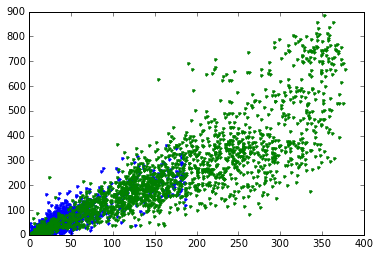

In [10]:
ann1 = ann_iter(df_train_train,df_train_target_a,arch ,10000)
print ann1
ann2 = ann_iter(df_train_train,df_train_target_b,arch ,10000)
print ann2
#ann3 = ann_iter(df_train_train,df_train_target_c,arch ,10000)
#print ann3

In [11]:
df_test_test = df_test
#df_test_test = df_test.drop(['holiday','workingday','weather','season'],axis = 1)
df_test_test['month'] = pd.DatetimeIndex(df_test_test.datetime).month
df_test_test['day'] = pd.DatetimeIndex(df_test_test.datetime).dayofweek
df_test_test['hour'] = pd.DatetimeIndex(df_test_test.datetime).hour
df_test_test = df_test_test.drop(['datetime'],axis = 1)

In [12]:
out1 = ann1['ann'].predict(df_test_test)
out2 = ann2['ann'].predict(df_test_test)
#out3 = ann3['ann'].predict(df_test_test)
out = out1 + out2

In [13]:
out = out.astype(int)
out[out<0] = 0

In [14]:
pred = pd.DataFrame({'datetime': df_test['datetime'],'count': out})
pred = pred[['datetime','count']]

In [15]:
pred.to_csv("pred.csv", index = False)

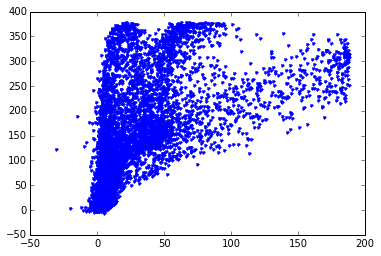

In [16]:
plt.plot(out1,out2,'.')

In [17]:
#plt.plot(out,out3,'.')

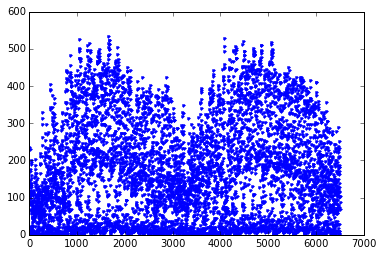

In [18]:
plt.plot(out,'.')

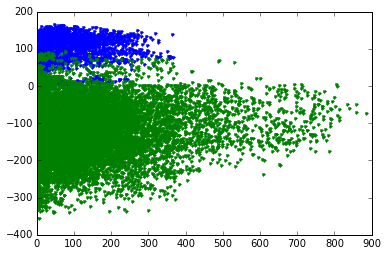

In [19]:
plt.plot(df_train_target_a,ann1['ann'].predict(preprocessing.scale(df_train_train)) ,'.')
plt.plot(df_train_target_b,ann2['ann'].predict(preprocessing.scale(df_train_train)) ,'.')

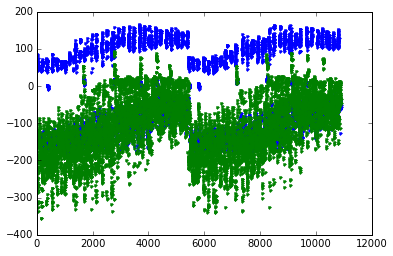

In [20]:
plt.plot(ann1['ann'].predict(preprocessing.scale(df_train_train)) ,'.')
plt.plot(ann2['ann'].predict(preprocessing.scale(df_train_train)) ,'.')